In [1]:
# python用のパッケージ
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

## Chapter2
２章では、この本で重要な役割を持つ、String Diagramについて説明されています。

String Diagramをきれいに書くために、GraphVizのdot記述を練習します。

nベクトルをニューラルネットワークに入力してmベクトルを出力として得るString Diagramは、以下のように作成します。

In [2]:
%%writefile models/ex_1.dot
digraph ex_1 {
    graph [rankdir=LR];
    // node
    start [label="", shape=none];
    end [label="", shape=none];
    NN [label="Newral Network\nLayer", shape="box", style="rounded,filled"];
    // edge
    start -> NN [label="n", arrowhead=none];
    NN -> end [label="m", arrowhead=none];
}

Overwriting models/ex_1.dot


In [3]:
%%bash
dot -Tpng -Gdpi=200 models/ex_1.dot > images/ex_1.png

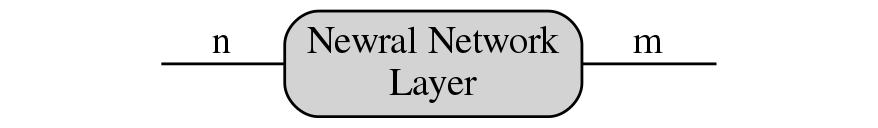

In [4]:
Image("images/ex_1.png")

In [5]:
%%writefile models/ex_2.dot
digraph ex_2 {
    graph [rankdir=LR];
    // node
    start [label="", shape=none];
    end [label="", shape=none];
    NN [label="Newral Network\nLayer", shape="box", style="rounded,filled"];
    // edge
    start -> NN [label="R^n", texlbl="$R^n$", lblstyle="auto", arrowhead=none];
    NN -> end [label="R^m", texlbl="$R^m$", lblstyle="auto", arrowhead=none];
}

Overwriting models/ex_2.dot


In [6]:
%%bash
dot -Tpng -Gdpi=200 models/ex_2.dot > images/ex_2.png

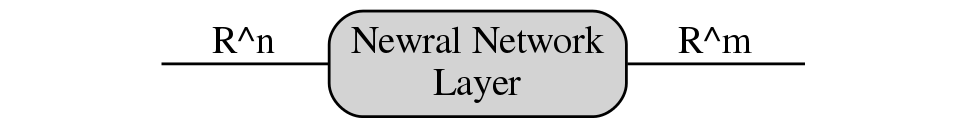

In [7]:
Image("images/ex_2.png")

In [8]:
%%writefile models/ex_3.dot
digraph ex_3 {
    graph [rankdir=LR];
    // グラフ名はcluster_で始める
    subgraph cluster_0 {
        label = "Newral Network Layer";
        style= "rounded"
        
        WRnm [label="W:R^nXm", shape="box", style="rounded,filled"];
        ReLU [ label="ReLU", shape="box", style="rounded,filled"];
        
        WRnm -> ReLU  [label="R^m", lblstyle="auto", arrowhead=none];
        
    };

    // node
    start [label="", shape=none];
    end [label="", shape=none];   

    // edge
    start -> WRnm [label="R^n", texlbl="$R^n$", lblstyle="auto", arrowhead=none];
    ReLU -> end [label="R^m", texlbl="$R^m$", lblstyle="auto", arrowhead=none];
}

Overwriting models/ex_3.dot


In [9]:
%%bash
dot -Tpng -Gdpi=200 models/ex_3.dot > images/ex_3.png

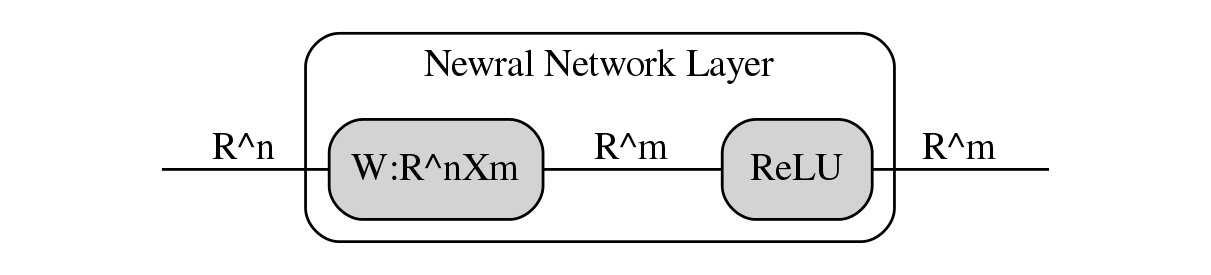

In [10]:
Image("images/ex_3.png")

In [11]:
%%writefile models/ex_4.dot
digraph ex_4 {
    graph [rankdir=LR];
    // グラフ名はcluster_で始める
    subgraph cluster_0 {
        label = "Recurrent Neural Network";
        style= "rounded";
        
        Layer1 [shape="box", style="rounded,filled"];
        Layer2 [shape="box", style="rounded,filled"];
        
        Layer1 -> Layer2  [label="y_1:R^r", lblstyle="auto", arrowhead=none];
        Layer1 -> Layer1 [label="y_1:R^r", lblstyle="auto", arrowhead=none];
        Layer2 -> Layer2 [label="y_2:R^s", lblstyle="auto", arrowhead=none];
        
    };

    // node
    start [label="", shape=none];
    end [label="", shape=none];   

    // edge
    start -> Layer1 [label="x_1:R^q", lblstyle="auto", arrowhead=none];
    Layer2 -> end [label="y_2:R^s", lblstyle="auto", arrowhead=none];
}

Overwriting models/ex_4.dot


In [12]:
%%bash
dot -Tpng -Gdpi=200 models/ex_4.dot > images/ex_4.png

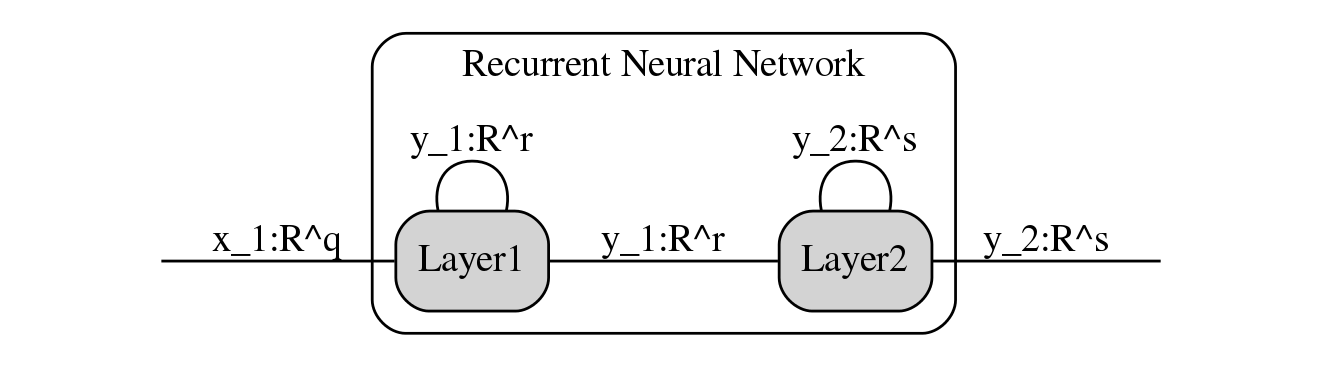

In [13]:
Image("images/ex_4.png")

In [1]:
%%writefile models/ex_5.dot
digraph ex_5 {
    graph [rankdir=LR];
    // グラフ名はcluster_で始める
    // node
    env_get_state [label="env.get_state()", shape="box", style="rounded,filled"];
    one_hot_encode [label="One-Hot\nEncode", shape="box", style="rounded,filled"];
        
    subgraph cluster_1 {
        label = "Layer1";
        style= "rounded";
        
        theta1 [label="θ_1:10x100", shape="box", style="rounded,filled"];
        ReLU1 [label="ReLU", shape="box", style="rounded,filled"];
        
        theta1 -> ReLU1 [arrowhead=none];
    };

    env_get_state -> one_hot_encode [label="N", lblstyle="auto", arrowhead=none];
    one_hot_encode -> theta1 [label="R^10", lblstyle="auto", arrowhead=none];

    sample_action [label="Sample Action", shape="box", style="rounded,filled"];
    softmax [label="Softmax", shape="box", style="rounded,filled"];

    subgraph cluster_2 {
        label = "Layer2";
        style= "rounded";
        
        ReLU2 [label="ReLU", shape="box", style="rounded,filled"];
        theta2 [label="θ_2:100x10", shape="box", style="rounded,filled"];
        
        ReLU2 -> theta2  [arrowhead=none];        
    };
    
    ReLU1 -> theta2  [arrowhead=none, topath="bend left"]; 
    
    sample_action -> softmax [label="P^10", lblstyle="auto", arrowhead=none];
    softmax -> ReLU2  [label="R^10", lblstyle="auto", arrowhead=none];
    
    // node
    env_choose_arm [label="env.choose_arm()", shape="box", style="rounded,filled"];
    loss_function [label="Loss Function", shape="box", style="rounded,filled"];
    Optimizer [shape="box", style="rounded,filled"];
    
    env_choose_arm -> loss_function [label="Reward:N", lblstyle="auto", arrowhead=none];
    loss_function -> Optimizer [arrowhead=none];
    
    sample_action -> env_choose_arm [label="N", lblstyle="auto", arrowhead=none];

    newrank=true;
    {rank=same; ReLU1, theta2}
    {rank=same; env_get_state, sample_action, env_choose_arm}
    {rank=same; one_hot_encode, softmax, loss_function}
}

Overwriting models/ex_5.dot


In [2]:
%%bash
dot -Tpng -Gdpi=200 models/ex_5.dot > images/ex_5.png

In [3]:
Image("images/ex_5.png")

NameError: name 'Image' is not defined

### dot2tex
dot2texで数式を表示してみたが、roundedやfillのスタイルがきかないため、使わないことにした。

In [17]:
%%writefile models/ex_2a.dot
digraph ex_2 {
    graph [rankdir=LR];
    // node
    start [label="", shape=none];
    end [label="", shape=none];
    NN [label="Newral Network\nLayer", shape="box"];
    // edge
    start -> NN [label="R^n", texlbl="$R^n$", lblstyle="auto", arrowhead=none];
    NN -> end [label="R^m", texlbl="$R^m$", lblstyle="auto", arrowhead=none];
}

Overwriting models/ex_2a.dot


In [18]:
%%bash
circo -Txdot models/ex_2a.dot | dot2tex -tmath --tikzedgelabels --docpreamble '\usetikzlibrary{automata}' \
    -s  > models/ex_2a.tex
latex models/ex_2a.tex
dvips ex_2a.dvi
ps2epsi ex_2a.ps
convert ex_2a.epsi images/ex_2a.png
rm *.dvi  *.ps *.epsi *.log *.aux

This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013/Debian)
 restricted \write18 enabled.
entering extended mode
(./models/ex_2a.tex
LaTeX2e <2011/06/27>
Babel <3.9h> and hyphenation patterns for 2 languages loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/latexconfig/color.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics/dvips.def)
(/usr/share/texmf/tex/latex/xcolor/x11nam.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texmf/tex/latex/pgf/frontendlayer/tikz.sty
(/usr/share/texmf/tex/la

This is dvips(k) 5.993 Copyright 2013 Radical Eye Software (www.radicaleye.com)
' TeX output 2018.09.24:0407' -> ex_2a.ps
</usr/share/texlive/texmf-dist/dvips/base/tex.pro>
</usr/share/texlive/texmf-dist/dvips/base/texps.pro>
</usr/share/texlive/texmf-dist/dvips/base/special.pro>
</usr/share/texlive/texmf-dist/dvips/base/color.pro>. 
</usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmmi7.pfb>
</usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmmi10.pfb>[1] 


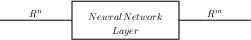

In [19]:
Image("images/ex_2a.png")

## Multi-Arm Bandit（多椀バンディット問題）を解く
強化学習では有名な例題みたい。
- http://ibisml.org/archive/ibis2014/ibis2014_bandit.pdf

前提条件
- 複数台のスロットマシンをプレイするギャンブラーのモデル 
- 得られる報酬の確率分布は台によって異なる
- なるべく期待値の高い台をプレイしたい

問題点
- ある程度の回数プレイしないと台の良し悪しが分からない
- 報酬の期待値の低い台を何度もプレイすると損

ここでは、最高$10まででるスロットルマシーンが題材となっている。

- 報酬: $R_k$（k回目の報酬）
- 報酬の期待値: $Q_k(a)$（アクションaに対するk回目までの期待値）

$$
Q_k(a) = \frac{R_1 + R_2 + ... + R_k}{k_a}
$$

アクションaの最尤値は、以下のように定義される。

$$
a = argmax_a (Q_k(a))
$$

## Epsilon-Greedy法
確率$\epsilon$でランダムに選択し、残りの$(1-\epsilon)$は、過去のプレイを元にベストのアクションを使用する。

In [97]:
from scipy import stats
import random

n = 10
arms = np.random.rand(n)  # 各アームの潜在確率
eps = 0.2
actions = np.zeros(n)

報酬は次のように実装します。

In [98]:
def reward(prob, n=10):
    reward = 0
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

過去の履歴historyはアクションaと報酬rewardのタプルで表します。

In [99]:
history = np.array([(1,8), (2,4), (1,7)])
history

array([[1, 8],
       [2, 4],
       [1, 7]])

この例では、３つのサンプル、アーム１で\$8、アーム２で\$4、アーム1で\$7を獲得したことを表します。
この例ではアーム1が(8+7)/2=7.5で一番報酬が多い

In [100]:
def get_best_arm(pastRewards, actions):
    bestArm = 0 #just default to 0
    bestMean = 0
    for action in actions:
        avg = np.mean(pastRewards[np.where(pastRewards[:,0] == action)][:, 1])
        if avg > bestMean:
            bestMean = avg
            bestArm = action
    return bestArm

結果のグラフは、乱数に依存し、私が試したところeps=0.2で何度か試行して以下の結果を得た！

/usr/lib/sagemath/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


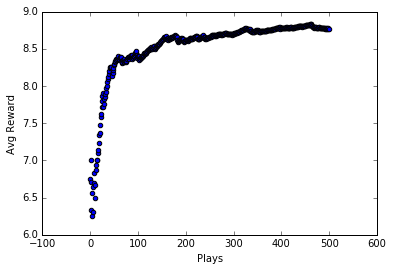

In [101]:
# avに３回の実施結果を入れて初期値とする
# avの初期値はnp.arrayにしないとダメだった
av = np.array([(1,8), (2,4), (1,7)])
plt.xlabel("Plays")
plt.ylabel("Avg Reward")
for i in  range(500):
    if random.random() > eps:
        choice = get_best_arm(av, actions)
    else:
        choice = np.where(arms == np.random.choice(arms))[0][0]
    thisAv = np.array([[choice, reward(arms[choice])]])
    av = np.vstack((av, thisAv))
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)

## Softmax選択ポリシー
ボルツマン分布を使う

$$
Pr(A) = \frac{e^{Q_k(A)/\tau}}{\Sigma_{i=1}^n e^{Q_k(i)/\tau}}
$$

- $\tau$は温度パラメータで、大きくなるほどすべての行動が選択される確率は同程度になる
- $\tau$が小さくなるほど価値推定値が大きい行動が選択されやすくなる

In [25]:
n = 10
arms = np.random.rand(n)
av = np.ones(n)
counts = np.zeros(n)
av_softmax = np.zeros(n)
av_softmax[:] = 1.0/n

In [26]:
def softmax(av, tau=1.12):
    softm = ( np.exp(av/tau)/np.sum(np.exp(av/tau)) )
    return softm

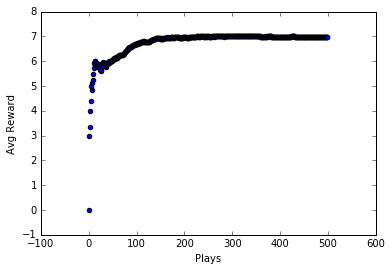

In [27]:
rwds = []
plt.xlabel("Plays")
plt.ylabel("Avg Reward")
for i in range(500):
    choice = np.where(arms == np.random.choice(arms, p=av_softmax))[0][0]
    counts[choice] += 1
    k = counts[choice]
    rwd = reward(arms[choice])
    rwds.append(rwd)
    old_avg = av[choice]
    new_avg = old_avg + (1/k)*(rwd - old_avg)
    av[choice] = new_avg
    av_softmax = softmax(av)
    runningMean = np.mean(rwds)
    plt.scatter(i, runningMean)

## torchでgradationを計算する


In [28]:
import torch

torch.Tensor([[1, 2, 3], [4, 5, 6]])

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.]])


$$
y = \frac{1}{2}x - 1
$$

In [29]:
x = torch.Tensor([2, 4])
y_known = torch.Tensor([0, 1])
m = torch.randn(2, requires_grad=True)
b = torch.randn(1, requires_grad=True)
y =  m*x + b
print m 
print b

tensor([-0.9101,  0.0229])
tensor([ 0.2651])


In [30]:
loss = (torch.sum(y_known - y))**2
loss.backward()
print(m.grad)
print(b.grad)

tensor([ -8.7934, -17.5867])
tensor([-8.7934])


In [35]:
import numpy as np
import torch as th
from torch.autograd import Variable
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [36]:
class ContextBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.init_distribution(arms)
        self.update_state()
        
    def init_distribution(self, arms):
        # Num states = Num Arms to keep things simple
        self.bandit_matrix = np.random.rand(arms,arms)
        #each row represents a state, each column an arm
        
    def reward(self, prob):
        reward = 0
        for i in range(self.arms):
            if random.random() < prob:
                reward += 1
        return reward
        
    def get_state(self):
        return self.state
    
    def update_state(self):
        self.state = np.random.randint(0,self.arms)
        
    def get_reward(self,arm):
        return self.reward(self.bandit_matrix[self.get_state()][arm])
        
    def choose_arm(self, arm):
        reward = self.get_reward(arm)
        self.update_state()
        return reward


In [37]:
def softmax(av, tau=1.12):
    n = len(av)
    probs = np.zeros(n)
    for i in range(n):
        softm = ( np.exp(av[i] / tau) / np.sum( np.exp(av[:] / tau) ) )
        probs[i] = softm
    return probs

def one_hot(N, pos, val=1):
    one_hot_vec = np.zeros(N)
    one_hot_vec[pos] = val
    return one_hot_vec

arms = 10
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 1, arms, 100, arms

model = th.nn.Sequential(
    th.nn.Linear(D_in, H),
    th.nn.ReLU(),
    th.nn.Linear(H, D_out),
    th.nn.ReLU(),
)

loss_fn = th.nn.MSELoss(size_average=False)

env = ContextBandit(arms)

In [38]:
def train(env):
    epochs = 5000
    #one-hot encode current state
    cur_state = Variable(th.Tensor(one_hot(arms,env.get_state())))
    reward_hist = np.zeros(50)
    reward_hist[:] = 5
    runningMean = np.average(reward_hist)
    learning_rate = 1e-2
    optimizer = th.optim.Adam(model.parameters(), lr=learning_rate)
    plt.xlabel("Plays")
    plt.ylabel("Mean Reward")
    for i in range(epochs):
        y_pred = model(cur_state) #produce reward predictions
        av_softmax = softmax(y_pred.data.numpy(), tau=2.0) #turn reward distribution into probability distribution
        av_softmax /= av_softmax.sum() #make sure total prob adds to 1
        choice = np.random.choice(arms, p=av_softmax) #sample an action
        cur_reward = env.choose_arm(choice)
        one_hot_reward = y_pred.data.numpy().copy()
        one_hot_reward[choice] = cur_reward
        reward = Variable(th.Tensor(one_hot_reward))
        loss = loss_fn(y_pred, reward)
        if i % 50 == 0:
            runningMean = np.average(reward_hist)
            reward_hist[:] = 0
            plt.scatter(i, runningMean)
        reward_hist[i % 50] = cur_reward
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model
        # parameters
        loss.backward()

        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimizer.step()
        cur_state = Variable(th.Tensor(one_hot(arms,env.get_state())))

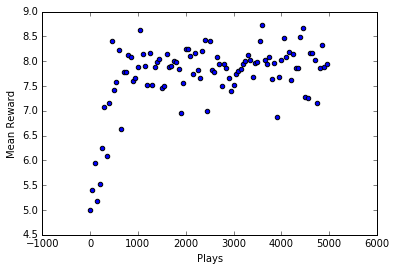

In [39]:
train(env)